In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 31 columns


In [5]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, RandomForestClassifier # Some classifiers
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split #Cross validation tools, and a train/test split utility
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter search tools
from hyperopt import hp, tpe, STATUS_OK, fmin, Trials #Hyperparameter search using a loss function

In [10]:
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/creditcard.csv', delimiter=',')
df.dataframeName = 'creditcard.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 17918 rows and 31 columns


In [11]:
X = df.iloc[:, 1:30]
y = df.iloc[:, 30:31]
X.head(), y.head()

(         V1        V2        V3        V4        V5        V6        V7  \
 0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
 2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
 3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
 4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   
 
         V24       V25       V26       V27       V28  

In [14]:
def class_amount_graph(class_num):
    # Select the subset of data where "Class" is equal to class_num
    fraudulent_data = data[data["Class"] == class_num]

    # Plot a histogram of the "Amount" feature for the fraudulent transactions
    plt.hist(fraudulent_data["Amount"], bins=25, color='red')
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Amount for Class {class_num} (Fraudulent)")
    plt.show()

In [16]:
!pip install lazypredict

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [19]:
# Read the data and print the first 5 rows
data = pd.read_csv("/content/creditcard.csv")
print(data.shape)
data.head()

(43664, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [20]:
# Get a statistical summary of it and more information
data.info()
print("\n\n\n")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43664 entries, 0 to 43663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43664 non-null  int64  
 1   V1      43664 non-null  float64
 2   V2      43664 non-null  float64
 3   V3      43664 non-null  float64
 4   V4      43664 non-null  float64
 5   V5      43664 non-null  float64
 6   V6      43664 non-null  float64
 7   V7      43664 non-null  float64
 8   V8      43664 non-null  float64
 9   V9      43664 non-null  float64
 10  V10     43664 non-null  float64
 11  V11     43664 non-null  float64
 12  V12     43664 non-null  float64
 13  V13     43664 non-null  float64
 14  V14     43664 non-null  float64
 15  V15     43664 non-null  float64
 16  V16     43664 non-null  float64
 17  V17     43664 non-null  float64
 18  V18     43664 non-null  float64
 19  V19     43664 non-null  float64
 20  V20     43664 non-null  float64
 21  V21     43664 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,...,43664.00,43664.00,43664.00,43664.00,43664.00,43664.00,43663.00,43663.00,43663.00,43663.00
mean,26888.25,-0.23,0.03,0.70,0.19,-0.24,0.10,-0.12,0.05,0.17,...,-0.03,-0.11,-0.04,0.01,0.14,0.02,0.01,0.01,90.31,0.00
std,12814.99,1.88,1.61,1.52,1.41,1.41,1.31,1.27,1.21,1.23,...,0.74,0.64,0.57,0.59,0.44,0.50,0.39,0.34,238.44,0.06
min,0.00,-56.41,-72.72,-32.45,-5.17,-42.15,-26.16,-26.55,-41.48,-8.51,...,-20.26,-8.59,-26.75,-2.84,-7.50,-1.44,-8.57,-9.62,0.00,0.00
25%,18719.75,-0.98,-0.54,0.23,-0.72,-0.85,-0.64,-0.60,-0.15,-0.58,...,-0.23,-0.53,-0.18,-0.32,-0.13,-0.33,-0.06,-0.01,7.57,0.00
50%,31883.00,-0.24,0.09,0.80,0.19,-0.28,-0.16,-0.07,0.05,0.05,...,-0.07,-0.08,-0.05,0.06,0.18,-0.07,0.01,0.02,24.89,0.00
75%,36950.00,1.16,0.74,1.44,1.07,0.29,0.49,0.43,0.32,0.88,...,0.10,0.30,0.08,0.40,0.42,0.30,0.08,0.08,81.56,0.00
max,41600.00,1.96,17.93,4.10,16.49,34.80,22.53,36.68,20.01,10.39,...,22.61,5.81,17.30,4.01,5.53,3.52,11.14,33.85,7879.42,1.00


In [21]:
def class_amount_graph(class_num):
    # Select the subset of data where "Class" is equal to class_num
    fraudulent_data = data[data["Class"] == class_num]

    # Plot a histogram of the "Amount" feature for the fraudulent transactions
    plt.hist(fraudulent_data["Amount"], bins=25, color='red')
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Amount for Class {class_num} (Fraudulent)")
    plt.show()

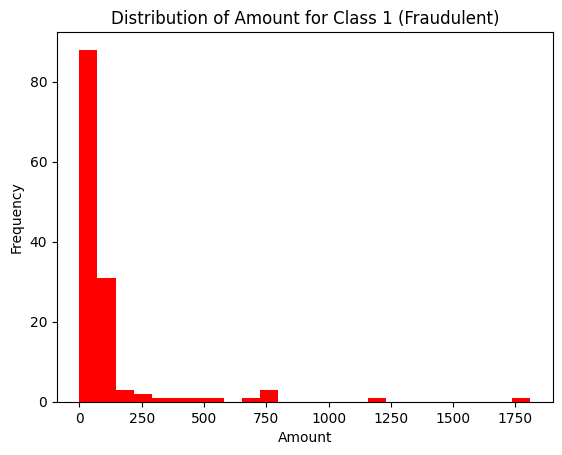

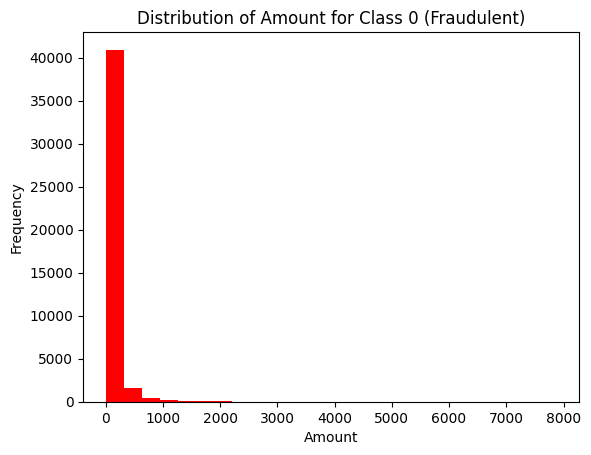

In [22]:
# Classes Distribution per Amounts
class_amount_graph(1)
print("\n\n\n")
class_amount_graph(0)

In [23]:
def top_10(class_num):

    # Get the top 10 amounts and their counts
    top_amounts = data[data["Class"] == class_num]["Amount"].value_counts().head(10)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    top_amounts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Amounts for Class {class_num} Transactions')
    plt.xlabel('Amount')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [24]:
# Class values distribution
print(data.Class.value_counts())
print("\n")
# Portion of each class
print("The portion for not being fraud:", (data.Class.value_counts()[0] / len(data)) * 100, "\nThe portion for being fraud:", (data.Class.value_counts()[1] / len(data)) * 100)


0.00    43529
1.00      134
Name: Class, dtype: int64


The portion for not being fraud: 99.69082081348479 
The portion for being fraud: 0.3068889703187981


In [25]:
# Split the target from the features
X = data.drop("Class", axis=1)
y = data.Class
print(y.value_counts())

0.00    43529
1.00      134
Name: Class, dtype: int64


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv("/content/creditcard.csv")

# Check for missing values in the target variable 'y'
print("Number of missing values in 'y':", data['Class'].isnull().sum())

# Remove rows with missing target values
data = data.dropna(subset=['Class'])

# Split the data into training and a temporary dataset
X = data.drop("Class", axis=1)
y = data.Class
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Further split the temporary dataset into validation and testing sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


Number of missing values in 'y': 1


In [28]:
# A base model as a starting point
clf1 = RandomForestClassifier(class_weight={0:1, 1:20})
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_dev)

# Generate a classification report
report = classification_report(y_dev, y_pred1)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13848
         1.0       0.91      0.89      0.90        35

    accuracy                           1.00     13883
   macro avg       0.96      0.94      0.95     13883
weighted avg       1.00      1.00      1.00     13883

